## Load dataset

In [52]:
import pandas as pd

df = pd.read_csv('tmp/20230626-dataset-notices-with-cpv-and-budget.csv')
df.tail()

notice_id                                        notice_type  \
67691  120755-2018                             Additional information   
67692  036925-2022                              Contract award notice   
67693  049966-2023                                    Contract notice   
67694  294702-2022  Prior information notice without call for comp...   
67695  350876-2014                                     Contract award   

       publication_date reference_notice_id         version  \
67691        20180320.0   2018/S 043-093186  R2.0.9.S02.E01   
67692        20220124.0   2021/S 140-371431  R2.0.9.S05.E01   
67693        20230125.0                 NaN  R2.0.9.S05.E01   
67694        20220603.0                 NaN  R2.0.9.S05.E01   
67695        20141016.0   2014/S 119-211252  R2.0.8.S02.E01   

                                                   title  \
67691                                                NaN   
67692  Pilot Project: Developing a Farmers Toolbox fo...   
67693  Second Phase Pilot Programme European Diplomat...   
67694  G2 System Support Phase CDE Security and PRS E...   
67695  Study and systematic investigation for distrib...   

                                       short_description  object_type  \
67691                                                NaN          LOT   
67692  Converting Farm Accountancy Data Network (FADN...  PROCUREMENT   
67693  A second phase of the pilot project Towards th...  PROCUREMENT   
67694  The G2 system engineering technical assistance...  PROCUREMENT   
67695  In Europe while fairly consolidated knowledge ...  PROCUREMENT   

            lot  estimated_value estimated_value_currency  min_value  \
67691  all lots              NaN                      NaN        NaN   
67692       NaN        1875000.0                      EUR  1835000.0   
67693       NaN         960000.0                      EUR        NaN   
67694       NaN       54700000.0                      EUR        NaN   
67695       NaN              NaN                      NaN    90000.0   

      min_value_currency  max_value max_value_currency  
67691                NaN        NaN                NaN  
67692                EUR  1835000.0                EUR  
67693                NaN        NaN                NaN  
67694                NaN        NaN                NaN  
67695                EUR    90000.0                EUR

In [53]:
df = df[df["object_type"] == "PROCUREMENT"]
df['title_texte'] = df["title"].fillna("") + " " + df["short_description"].fillna("")
df = df.drop('title', axis=1)
df = df.drop('short_description', axis=1)
df = df.drop('lot', axis=1)
df = df.drop('publication_date', axis=1)
df = df.drop('notice_type', axis=1)
df = df.drop('reference_notice_id', axis=1)
df = df.drop('version', axis=1)
df = df.drop('object_type', axis=1)
df.tail()

notice_id  estimated_value estimated_value_currency  min_value  \
67690  120755-2018              NaN                      NaN        NaN   
67692  036925-2022        1875000.0                      EUR  1835000.0   
67693  049966-2023         960000.0                      EUR        NaN   
67694  294702-2022       54700000.0                      EUR        NaN   
67695  350876-2014              NaN                      NaN    90000.0   

      min_value_currency  max_value max_value_currency  \
67690                NaN        NaN                NaN   
67692                EUR  1835000.0                EUR   
67693                NaN        NaN                NaN   
67694                NaN        NaN                NaN   
67695                EUR    90000.0                EUR   

                                             title_texte  
67690  Proofofprinciples testing of First Wall tile R...  
67692  Pilot Project: Developing a Farmers Toolbox fo...  
67693  Second Phase Pilot Programme European Diplomat...  
67694  G2 System Support Phase CDE Security and PRS E...  
67695  Study and systematic investigation for distrib...

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44300 entries, 0 to 67695
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   notice_id                 44298 non-null  object 
 1   estimated_value           12512 non-null  float64
 2   estimated_value_currency  13912 non-null  object 
 3   min_value                 13488 non-null  float64
 4   min_value_currency        13489 non-null  object 
 5   max_value                 13488 non-null  float64
 6   max_value_currency        13489 non-null  object 
 7   title_texte               44300 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.0+ MB


## Only keep notices with actual budgetary value

In [55]:
df["estimated_value_currency"].value_counts()

estimated_value_currency
EUR    13293
BOB      177
USD      114
RON       71
GBP       56
INR       41
MAD       29
XOF       17
CZK       11
TND       10
NOK       10
DKK        9
RSD        9
CHF        8
JPY        5
SEK        4
AMD        4
XAF        4
PLN        3
ARS        2
ETB        2
CAD        2
MDL        2
SLL        2
CNY        2
MUR        2
BRL        2
EGP        2
COP        2
THB        2
IDR        2
GEL        1
MMK        1
MGA        1
MZN        1
CRC        1
TZS        1
NPR        1
MYR        1
BBD        1
ALL        1
FJD        1
UAH        1
ZAR        1
Name: count, dtype: int64

In [56]:
actual_value_df = df[
    (df["min_value"] == df["max_value"]) & df["min_value"].notna() & (df["min_value_currency"] == "EUR")]
actual_value_df = actual_value_df.rename(columns={"min_value": "value"})
actual_value_df = actual_value_df.drop('estimated_value', axis=1)
actual_value_df = actual_value_df.drop('estimated_value_currency', axis=1)
actual_value_df = actual_value_df.drop('min_value_currency', axis=1)
actual_value_df = actual_value_df.drop('max_value', axis=1)
actual_value_df = actual_value_df.drop('max_value_currency', axis=1)

In [57]:
actual_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12169 entries, 2 to 67695
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   notice_id    12169 non-null  object 
 1   value        12169 non-null  float64
 2   title_texte  12169 non-null  object 
dtypes: float64(1), object(2)
memory usage: 380.3+ KB


In [80]:
actual_value_df = actual_value_df.drop_duplicates(subset=["title_texte"], keep=False)

In [81]:
actual_value_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11393 entries, 2 to 67695
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   notice_id    11393 non-null  object 
 1   value        11393 non-null  float64
 2   title_texte  11393 non-null  object 
dtypes: float64(1), object(2)
memory usage: 356.0+ KB


## Encode texts using sentence transformer model

In [82]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [83]:
corpus_occupations = actual_value_df["title_texte"].to_list()
corpus_occupations_embeddings = embedder.encode(corpus_occupations, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/357 [00:00<?, ?it/s]

In [84]:
import torch

In [85]:
torch.save(corpus_occupations_embeddings, "tmp/20230622-embeddings.pkl")

In [86]:
corpus_occupations_embeddings = torch.load("tmp/20230622-embeddings.pkl")

## Test model on some sentences

In [87]:
from sentence_transformers import util


def get_top_k(query):
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    cos_scores = util.cos_sim(query_embedding, corpus_occupations_embeddings)[0]
    top_results = torch.topk(cos_scores, k=5)
    for score, idx in list(zip(top_results[0], top_results[1]))[1:]:
        doc = actual_value_df.iloc[int(idx)]
        if doc["title_texte"] == query:
            continue
        print(f'* Text: {doc["title_texte"]}')
        print(f'* Actual value: {doc["value"]}')
        print(f'* Similarity score: {score:.4f}')
        print(f'==========')

In [88]:
sample = actual_value_df.iloc[0]
print("===== INPUT =====")
print(f'* Text: {sample["title_texte"]}')
print(f'* Actual value: {sample["value"]}')
print("===== Top 5 =====")
get_top_k(sample["title_texte"])

===== INPUT =====
* Text: Planning supply installation and commissioning of software and hardware for the JRC Karlsruhes neutron and gamma waste measurement system Planning supply installation and commissioning of software and hardware for the JRC Karlsruhes neutron and gamma waste measurement system
* Actual value: 220100.0
===== Top 5 =====
* Text: Supply of one Complete Gamma Spectrometry Acquisition System and Four Electrically Cooled HPGe Detectors for the JRC Karlsruhe JRC Karlsruhe plans to purchase one complete gamma spectrometry acquisition system and four electrically cooled HPGe detectors for safeguards related measurements measurements supporting radioactive transports and safeguards and security training.
* Actual value: 283371.02
* Similarity score: 0.6175
* Text: Maintenance/servicing/installation of equipment in a nuclear facility The JRC Karlsruhe is planning to have the following works undertaken under a framework contract:
* Actual value: 4000000.0
* Similarity score

In [89]:
sample = actual_value_df.iloc[1]
print("===== INPUT =====")
print(f'* Text: {sample["title_texte"]}')
print(f'* Actual value: {sample["value"]}')
print("===== Top 5 =====")
get_top_k(sample["title_texte"])

===== INPUT =====
* Text: Provision of support to EDA meetings with a maieutic tool. Provision of support to EDA meetings with a maieutic tool.
* Actual value: 400000.0
===== Top 5 =====
* Text: 15.CAT.OP.012 Provision of maieutic tool sessions 15.CAT.OP.012 Provision of maieutic tool sessions.
* Actual value: 400000.0
* Similarity score: 0.5737
* Text: Provision of technical and administrative support to the RIS expert groups The objective of this contract is to provide technical and administrative support to the RIS expert groups including inter alia the organisation of meetings the preparation and distribution of technical papers prior to the meetings and the preparation of detailed reports sent to the members of the expert groups including the European Commission the inventory of the requests to change/update the RIS specifications.
* Actual value: 149690.0
* Similarity score: 0.5078
* Text: Provision of technical and administrative support to the RIS expert groups. The objective o

## Save values of top-20 most similar notices

In [90]:
def top_20_values(query):
    k = 20
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    cos_scores = util.cos_sim(query_embedding, corpus_occupations_embeddings)[0]
    top_results = torch.topk(cos_scores, k=k + 1)
    values = []
    for score, idx in list(zip(top_results[0], top_results[1])):
        doc = actual_value_df.iloc[int(idx)]
        if doc["title_texte"] != query:
            values.append(doc["value"])
        if len(values) == k:
            break
    assert len(values) == k, f"{len(values)}"
    return values

In [91]:
from tqdm import tqdm

tqdm.pandas()

actual_value_df["top_20_values"] = actual_value_df["title_texte"].progress_apply(top_20_values)

100%|██████████| 11393/11393 [04:02<00:00, 47.07it/s]


In [92]:
actual_value_df.to_csv("tmp/20230626-similar-texts-with-actual-value.csv")

In [93]:
actual_value_df = pd.read_csv("tmp/20230626-similar-texts-with-actual-value.csv")
actual_value_df["top_20_values"] = actual_value_df["top_20_values"].apply(eval)

In [94]:
actual_value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11393 entries, 0 to 11392
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11393 non-null  int64  
 1   notice_id      11393 non-null  object 
 2   value          11393 non-null  float64
 3   title_texte    11393 non-null  object 
 4   top_20_values  11393 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 445.2+ KB


## Compare actual value with average actual value of top-K most similar notices

In [194]:
def difference(df, k):
    return (df["value"] - df["top_20_values"].apply(lambda l: sum(l[:k]) / k)).abs()

In [195]:
def relative_difference(df, k):
    filtered_df = df[df["value"] != 0]
    return ((filtered_df["value"] - filtered_df["top_20_values"].apply(lambda l: sum(l[:k]) / k)).abs()
            / filtered_df["value"])

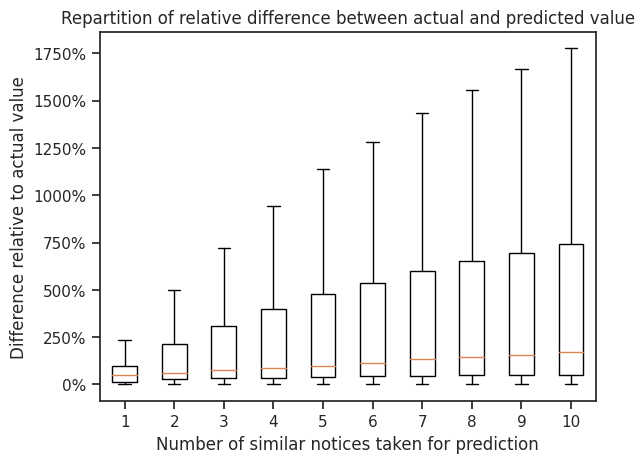

In [196]:
from matplotlib import ticker, pyplot as plt

differences = [relative_difference(actual_value_df, k) * 100 for k in range(1, 11)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of relative difference between actual and predicted value")
plt.xlabel("Number of similar notices taken for prediction")
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f%%'))
plt.ylabel("Difference relative to actual value")
plt.show()

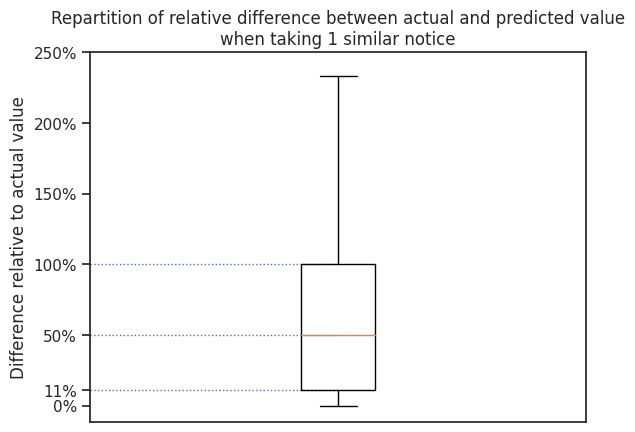

In [211]:
import numpy as np
from matplotlib import ticker

differences = [relative_difference(actual_value_df, k) * 100 for k in range(1, 2)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of relative difference between actual and predicted value\nwhen taking 1 similar notice")
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f%%'))
plt.ylabel("Difference relative to actual value")
plt.xticks([])
quantiles = np.quantile(differences, np.array([0.25, 0.50, 0.75]))
plt.hlines(quantiles, [0.5] * quantiles.size, [1] * quantiles.size,
           color='b', ls=':', lw=1, zorder=0)
plt.yticks(sorted(set(list(quantiles) + list(range(0, 300, 50)))))
plt.show()

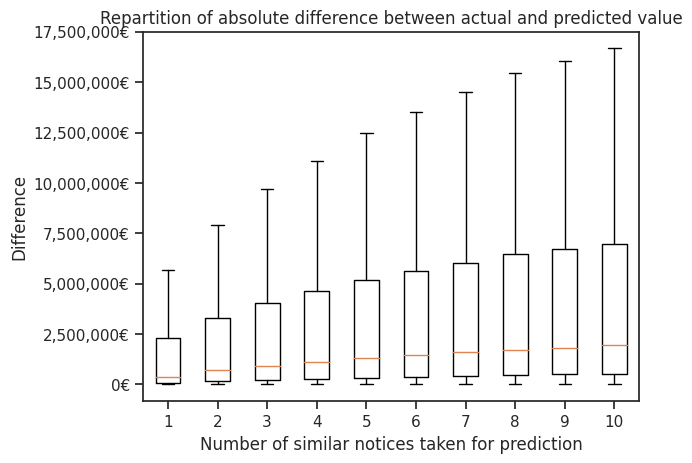

In [204]:
from matplotlib import ticker, pyplot as plt

differences = [difference(actual_value_df, k) for k in range(1, 11)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of absolute difference between actual and predicted value")
plt.xlabel("Number of similar notices taken for prediction")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.0f}€"))
plt.ylabel("Difference")
plt.show()

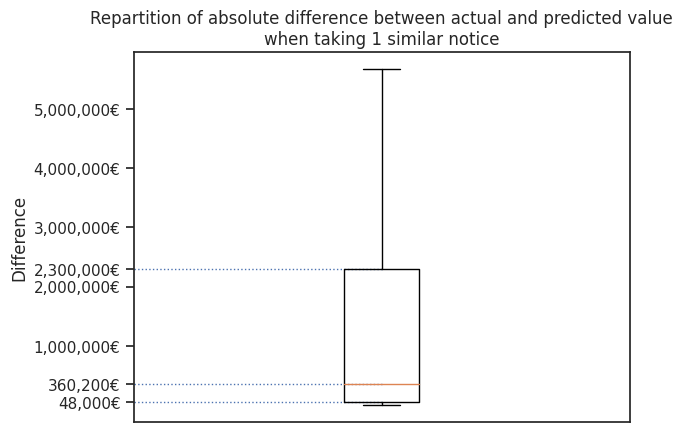

In [210]:
import numpy as np
from matplotlib import ticker

differences = [difference(actual_value_df, k) for k in range(1, 2)]
plt.boxplot(differences, showfliers=False)
plt.title("Repartition of absolute difference between actual and predicted value\nwhen taking 1 similar notice")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.0f}€"))
plt.ylabel("Difference")
plt.xticks([])
quantiles = np.quantile(differences, np.array([0.25, 0.50, 0.75]))
plt.hlines(quantiles, [0.5] * quantiles.size, [1] * quantiles.size,
           color='b', ls=':', lw=1, zorder=0)
plt.yticks(sorted(set(list(quantiles) + list(range(1000000, 6000000, 1000000)))))
plt.show()